# Flatiron School 071519 DS Parttime Online Capstone Project - Citibike Station availability forecasting - Decision Trees and Random Forest

The first ML Classification methods I will utilize are the decision tree and random forest models. For each I will begin with a baseline model and then attempt to improve performance by tuning their hyper parameters.


## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import itertools

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline

import joblib
from joblib import dump

import warnings
warnings.filterwarnings("ignore")

## Data

I'll start by bringing in the downsampled dataset.

In [2]:
april_rides_downsampled = pd.read_csv('april_rides_downsampled.txt', delimiter=',')
april_rides_downsampled = april_rides_downsampled.drop('Unnamed: 0', axis=1)
april_rides_downsampled.head()

,status,tempF,neighborhood_Battery Park,neighborhood_Bedford Stuyvesant,neighborhood_Boerum Hill,neighborhood_Brooklyn Heights,neighborhood_Bushwick,neighborhood_Carnegie Hill,neighborhood_Carroll Gardens,neighborhood_Central Park,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,stat_size_Large,stat_size_Medium,stat_size_Small,ct_revised
0,High,62.6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
1,High,62.6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,16
2,High,69.8,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,22
3,High,62.6,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,30
4,High,53.6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,30


In [3]:
y = april_rides_downsampled.status
X = april_rides_downsampled.drop('status', axis=1)

In [4]:
#
#Given the size of the data, I opt to split the training data into four sets
#So I essentially have 4 portions of a training set and 1 portion of a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X_train, 
                                                              y_train, 
                                                              test_size=0.5,
                                                              random_state=123)

X_train_1_1, X_train_1_2, y_train_1_1, y_train_1_2 = train_test_split(X_train_1, 
                                                                      y_train_1, 
                                                                      test_size=0.5,
                                                                      random_state=123)

X_train_2_1, X_train_2_2, y_train_2_1, y_train_2_2 = train_test_split(X_train_2, 
                                                                      y_train_2, 
                                                                      test_size=0.5,
                                                                      random_state=123)

In [5]:
#
#Here is code for a function which plots a confusion matrix of the given test
#data set
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    #This generates a 2D display
    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title(title) 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here I iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

Baseline Training Accuracy: 90.37%
Baseline Test Accuracy: 86.61%

Normalized confusion matrix
[[0.93250282 0.0085514  0.05894579]
 [0.01459288 0.89300643 0.09240069]
 [0.09338386 0.13329511 0.77332104]]


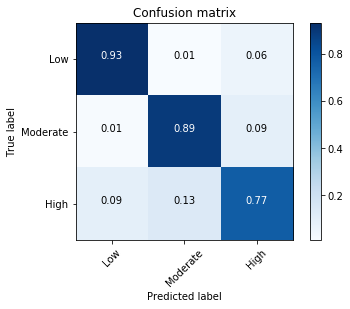

In [6]:
#Starting with a baseline classifier (parameter optimization will come later)
#and only setting the random state of the model.
dtclassifier = DecisionTreeClassifier(random_state=123)
dtclassifier.fit(X_train, y_train)
print(dtclassifier.fit(X_train, y_train))

#This is the accuracy score of the baseline training model
training_accuracy = dtclassifier.score(X_train, y_train)

#This is the accuracy score of the baseline test model
test_accuracy = dtclassifier.score(X_test, y_test)

print("")
print('Baseline Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Baseline Test Accuracy: {:.4}%'.format(test_accuracy * 100))
print("")

#print a confusion matrix
y_hat_test = dtclassifier.predict(X_test)
class_names = set(y)
cnf_mat_dt = confusion_matrix(y_test, y_hat_test)
plot_confusion_matrix(cnf_mat_dt, classes=class_names, normalize=True)

In [7]:
dtclassifier.tree_.max_depth

75

In [8]:
dtclassifier.tree_.max_n_classes

3

I tried to display an image of the tree using the below code, but my machine was not able to produce it. The max depth of this tree is 75. This makes sense, given the number of features present in the final dataset produced by the number of dummy variables (one for each of the many neighborhoods). The number of continuous inputs is few, which limits the ability to tune the model.

In [7]:
# from sklearn.tree import export_graphviz
# from IPython.display import Image
# from pydotplus import graph_from_dot_data

# dot_data = export_graphviz(dtclassifier, out_file=None, feature_names=X_train.columns,
#                           class_names=np.unique(y).astype('str'),
#                           filled=True, rounded=True, special_characters=True)

# graph = graph_from_dot_data(dot_data)

# Image(graph.create_png())

### DT Model tuning

In the below cell, I call a Pipeline operator on a set of parameters through a grid search with cross validation, which allows a comparison between performance scores across a selection of specified parameters.

I begin choosing between the gini and entropy to measure the quality of the split based on the impurity measure. Entropy, is what is used for the information gain approach and splits nodes such that it gives the most information gain. Gini represents the Gini Impurity or the Gini Index which measures the divergences between the probability distributions of the target attributes values and splits nodes such that the split gives the least amount of impurity.

Next I approach tuning max_depth, which is the maximum depth of the tree. We know that when I didn't specify depth, the model took the tree down to 75 levels. Again, while this might seem very high, we are dealing with a dataset with 92 columns, most of which are categorical variables. Because I expect accuracy loss to be significant with the reduction of depth, I include 70 as an option to maintain a relatively high depth.

Next I look at tuning the minimum number of samples required to be at a leaf node. 1 is the default, but I tried adjusting up to 2. Making sure each leaf has more than one element can help avoid overfitting. Again, given the low number of inputs for the data, this might be something that cannot help be avoided for this model.

Finally I look at tuning the min_samples_split, the number of samples required to split an internal node. We know that higher values in this parameter can lead to underfitting, so I opt to stay close to default of 2.

In [13]:
pipe_dt = Pipeline([('clf', DecisionTreeClassifier(random_state=123))])

dt_grid = {'clf__criterion': ['gini', 'entropy'],
           'clf__max_depth': [50, 70],
           'clf__min_samples_leaf': [1, 2],
           'clf__min_samples_split': [2, 3, 4]
          }

gs_dt = GridSearchCV(estimator=pipe_dt,
                     param_grid=dt_grid, 
                     scoring='accuracy', 
                     cv=3, verbose=False, refit=True, 
                     return_train_score=True)

print(gs_dt)
gs_dt.fit(X_train, y_train)
print('\nBest parameters:\n', gs_dt.best_params_)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                         

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=70, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

Baseline Training Accuracy: 90.37%
Baseline Test Accuracy: 86.61%

Normalized confusion matrix
[[0.932002   0.00872668 0.05927132]
 [0.01448024 0.89325674 0.09226302]
 [0.09385751 0.13279653 0.77334596]]


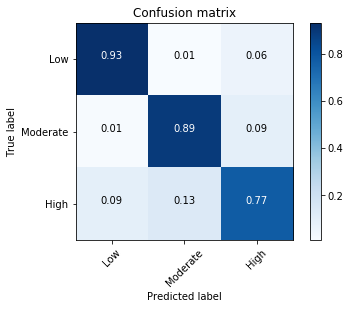

In [14]:
#
#Based on the above gridsearch, I come out with a tree that has very close to 
#default parameters, and as such, there is not much improvement on the accuracy
#over the baseline model.
dtclassifier = DecisionTreeClassifier(criterion='gini',  min_samples_leaf=1,
                                      max_depth=70, min_samples_split=2, random_state=123)

dtclassifier.fit(X_train, y_train)
print(dtclassifier.fit(X_train, y_train))

#This is the accuracy score of the baseline training model
training_accuracy = dtclassifier.score(X_train, y_train)

#This is the accuracy score of the baseline test model
test_accuracy = dtclassifier.score(X_test, y_test)

print("")
print('Baseline Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Baseline Test Accuracy: {:.4}%'.format(test_accuracy * 100))
print("")

#print a confusion matrix
y_hat_test = dtclassifier.predict(X_test)
class_names = set(y)
cnf_mat_dt = confusion_matrix(y_test, y_hat_test)
plot_confusion_matrix(cnf_mat_dt, classes=class_names, normalize=True)

### RF

Similar to the Decision Tree I will begin with a baseline model. It is important to note that I use one of the split training sets for this model.

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

Baseline Training Accuracy: 92.66%
Baseline Test Accuracy: 81.03%

Normalized confusion matrix
[[0.88305997 0.01797922 0.09896081]
 [0.02505569 0.8311056  0.1438387 ]
 [0.11883632 0.16415715 0.71700653]]


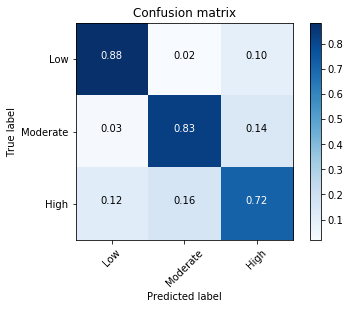

In [16]:
#Generate a baseline RandomForest Classifier. Default estimator is always a 
#Decision Tree classifier. The number of estimators defaults to 100. The 
#samples are being drawn with replacement because bootstrap defaults to True.
rfclassifier = RandomForestClassifier(random_state=123, n_jobs=-1)
print(rfclassifier.fit(X_train_1_1, y_train_1_1))

#This is the accuracy score of the baseline training model
training_accuracy = rfclassifier.score(X_train_1_1, y_train_1_1)

#This is the accuracy score of the baseline testing model
test_accuracy = rfclassifier.score(X_test, y_test)

print("")
print('Baseline Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Baseline Test Accuracy: {:.4}%'.format(test_accuracy * 100))
print("")

#plot_feature_importances(rfclassifier, X_train)

#plot a confusion matrix for the full forest
y_hat_test = rfclassifier.predict(X_test)
class_names = set(y)
cnf_mat_rf = confusion_matrix(y_test, y_hat_test)
plot_confusion_matrix(cnf_mat_rf, classes=class_names, normalize=True)

For the forest, the parameters are slightly different.

I first need to choose the number of trees I want in the forest, n_estimators. 

Next I choose the criterion, similar to DT. I also want to decide on the max_features, the number of features considered for splitting a node. Auto represents the default consideration, which is the sqrt(n_features). I also inspect the performance of log2(n_features).

Next I take a look at depth and min_samples_split. Here I tried to work with much smaller trees and have larger internal nodes, but the model leaned towards the default values (no max depth, min samples split = 2).

In [17]:
pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state=123))])

rf_grid = {'clf__n_estimators': [150, 300],
          'clf__criterion': ['gini', 'entropy'],
          'clf__max_features': ['auto', 'log2'],
          'clf__max_depth': [None, 7, 15],
          'clf__min_samples_split': [2, 10]
          }

gs_rf = GridSearchCV(estimator=pipe_rf,
                     param_grid=rf_grid, 
                     scoring='accuracy', 
                     cv=3, verbose=False, refit=True, 
                     return_train_score=True)

print(gs_rf)
gs_rf.fit(X_train_1_1, y_train_1_1)
print('\nBest parameters:\n', gs_rf.best_params_)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                              

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

Baseline Training Accuracy: 90.37%
Baseline Test Accuracy: 86.68%

Normalized confusion matrix
[[0.92499061 0.00906473 0.06594466]
 [0.0134665  0.88410803 0.10242547]
 [0.08655332 0.12189011 0.79155656]]


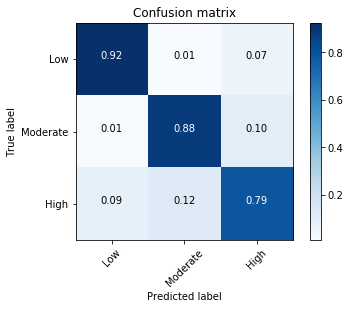

In [18]:
rfclassifier = RandomForestClassifier(criterion='gini',  max_features='auto', min_samples_split=2, 
                                      n_estimators=300, n_jobs=-1, random_state=123)

rfclassifier.fit(X_train, y_train)
print(rfclassifier.fit(X_train, y_train))

#This is the accuracy score of the baseline training model
training_accuracy = rfclassifier.score(X_train, y_train)

#This is the accuracy score of the baseline testing model
test_accuracy = rfclassifier.score(X_test, y_test)

print("")
print('Baseline Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Baseline Test Accuracy: {:.4}%'.format(test_accuracy * 100))
print("")

#plot_feature_importances(rfclassifier, X_train)

#plot a confusion matrix for the full forest
y_hat_test = rfclassifier.predict(X_test)
class_names = set(y)
cnf_mat_rf = confusion_matrix(y_test, y_hat_test)
plot_confusion_matrix(cnf_mat_rf, classes=class_names, normalize=True)

We did see improved performance when we provide the model with the adjusted parameters and full data set.

I then save this model to be used in the dash application.

In [19]:
import joblib
from joblib import dump

rf_mod_1 = rfclassifier

dump(rf_mod_1, '/Users/zazue/PycharmProjects/TrialforCapstone/venv2/rf_mod_1.joblib')

['/Users/zazue/PycharmProjects/TrialforCapstone/venv2/rf_mod_1.joblib']

### Takeaways

The RF model has an accuracy of 86.68%, which seems tolerable. The worst case scenario would be to have a true Low label that is predicted as Moderate or High because the client would be expecting there to be bikes available at the station (if they were given a Moderate/High) and there wouldn't be. The accuracy on true Low labels is 92% which seems more tolerable.

One of the biggest problems I faced was runtime on these models. Next time I would use a randomized search cv to reduce that. I would also take a different approach to inputs to add continuous variables and reduce categorical variables.